In [1]:
import numpy as np
from nba_api.stats.static import players
from nba_api.stats.endpoints import playergamelog
import pandas as pd

lebron_list = players.find_players_by_full_name("LeBron James")
if lebron_list:
    # We assume the first matching result is LeBron James (typically his full_name is "LeBron James")
    lebron = lebron_list[0]
    player_id = lebron['id']
    print("LeBron James player ID:", player_id)
else:
    raise Exception("Player not found.")

LeBron James player ID: 2544


In [ ]:
import time


regular_season_career = pd.DataFrame()
playoff_career = pd.DataFrame()

# Define the range of seasons; LeBron's rookie season was 2003-04.
# For example, to get seasons from 2003-04 up to 2022-23:
start_year = 2003
end_year = 2025  # end_year is the starting calendar year for the season, e.g., 2022-23 season => 2025

# Loop over each season
for season_year in range(start_year, end_year):
    # Format the season string as "YYYY-YY"
    season_str = f"{season_year}-{str(season_year + 1)[-2:]}"
    print(f"\nFetching game logs for season: {season_str}")

    # Regular Season
    try:
        reg_logs = playergamelog.PlayerGameLog(player_id=player_id, season=season_str, season_type_all_star='Regular Season')
        reg_df = reg_logs.get_data_frames()[0]
        # Add season info as a new column
        reg_df['SEASON'] = season_str
        regular_season_career = pd.concat([regular_season_career, reg_df], ignore_index=True)
        print(f"  Regular season games fetched: {len(reg_df)}")
    except Exception as e:
        print(f"  Could not fetch regular season logs for {season_str}: {e}")

    # Playoffs
    try:
        playoff_logs = playergamelog.PlayerGameLog(player_id=player_id, season=season_str, season_type_all_star='Playoffs')
        playoff_df = playoff_logs.get_data_frames()[0]
        playoff_df['SEASON'] = season_str
        playoff_career = pd.concat([playoff_career, playoff_df], ignore_index=True)
        print(f"  Playoff games fetched: {len(playoff_df)}")
    except Exception as e:
        print(f"  Could not fetch playoff logs for {season_str}: {e}")

    # Optional: pause to be respectful with API calls (avoid hitting rate limits)
    time.sleep(1)

# Display the first few rows of the complete career logs
print("\nComplete Regular Season Career Game Logs:")
print(regular_season_career.head())

print("\nComplete Playoff Career Game Logs:")
print(playoff_career.head())



Fetching game logs for season: 2003-04
  Regular season games fetched: 79
  Playoff games fetched: 0

Fetching game logs for season: 2004-05
  Regular season games fetched: 80
  Playoff games fetched: 0

Fetching game logs for season: 2005-06
  Regular season games fetched: 79


/var/folders/jm/k0sbz0kn3lv4fr42mlqlgyz40000gn/T/ipykernel_90653/1451436411.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  playoff_career = pd.concat([playoff_career, playoff_df], ignore_index=True)


  Playoff games fetched: 13

Fetching game logs for season: 2006-07
  Regular season games fetched: 78
  Playoff games fetched: 20

Fetching game logs for season: 2007-08
  Regular season games fetched: 75
  Playoff games fetched: 13

Fetching game logs for season: 2008-09
  Regular season games fetched: 81
  Playoff games fetched: 14

Fetching game logs for season: 2009-10
  Regular season games fetched: 76
  Playoff games fetched: 11

Fetching game logs for season: 2010-11
  Regular season games fetched: 79
  Playoff games fetched: 21

Fetching game logs for season: 2011-12
  Regular season games fetched: 62
  Playoff games fetched: 23

Fetching game logs for season: 2012-13
  Regular season games fetched: 76
  Playoff games fetched: 23

Fetching game logs for season: 2013-14
  Regular season games fetched: 77
  Playoff games fetched: 20

Fetching game logs for season: 2014-15
  Regular season games fetched: 69
  Playoff games fetched: 20

Fetching game logs for season: 2015-16
  Reg

/var/folders/jm/k0sbz0kn3lv4fr42mlqlgyz40000gn/T/ipykernel_90653/1451436411.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  playoff_career = pd.concat([playoff_career, playoff_df], ignore_index=True)


  Playoff games fetched: 0

Fetching game logs for season: 2019-20
  Regular season games fetched: 67
  Playoff games fetched: 21

Fetching game logs for season: 2020-21
  Regular season games fetched: 45
  Playoff games fetched: 6

Fetching game logs for season: 2021-22
  Regular season games fetched: 56


/var/folders/jm/k0sbz0kn3lv4fr42mlqlgyz40000gn/T/ipykernel_90653/1451436411.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  playoff_career = pd.concat([playoff_career, playoff_df], ignore_index=True)


  Playoff games fetched: 0

Fetching game logs for season: 2022-23
  Regular season games fetched: 55
  Playoff games fetched: 16

Fetching game logs for season: 2023-24
  Regular season games fetched: 71
  Playoff games fetched: 5

Fetching game logs for season: 2024-25
  Regular season games fetched: 69
  Playoff games fetched: 0


/var/folders/jm/k0sbz0kn3lv4fr42mlqlgyz40000gn/T/ipykernel_90653/1451436411.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  playoff_career = pd.concat([playoff_career, playoff_df], ignore_index=True)



Complete Regular Season Career Game Logs:
  SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP WL  MIN  FGM  \
0     22003       2544  0020301179  APR 14, 2004    CLE @ NYK  W   35    8   
1     22003       2544  0020301162  APR 12, 2004  CLE vs. MIL  W   45    9   
2     22003       2544  0020301151  APR 10, 2004  CLE vs. MIA  W   32    4   
3     22003       2544  0020301137  APR 09, 2004    CLE @ MIA  L   42    6   
4     22003       2544  0020301128  APR 07, 2004    CLE @ MEM  L   36    4   

   FGA  FG_PCT  ...  REB  AST  STL  BLK  TOV  PF  PTS  PLUS_MINUS  \
0   17   0.471  ...    1    5    3    0    5   1   17          -6   
1   20   0.450  ...    7    9    2    0    1   1   27          11   
2   11   0.364  ...    3   11    0    0    2   3   10          14   
3   14   0.429  ...    7    8    1    0    8   2   24         -16   
4   11   0.364  ...    3    5    3    0    2   4   14         -11   

   VIDEO_AVAILABLE   SEASON  
0                0  2003-04  
1            

In [14]:
print(regular_season_career.head())
print(regular_season_career.columns)

  SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP WL  MIN  FGM  \
0     22003       2544  0020301179  APR 14, 2004    CLE @ NYK  W   35    8   
1     22003       2544  0020301162  APR 12, 2004  CLE vs. MIL  W   45    9   
2     22003       2544  0020301151  APR 10, 2004  CLE vs. MIA  W   32    4   
3     22003       2544  0020301137  APR 09, 2004    CLE @ MIA  L   42    6   
4     22003       2544  0020301128  APR 07, 2004    CLE @ MEM  L   36    4   

   FGA  FG_PCT  ...  REB  AST  STL  BLK  TOV  PF  PTS  PLUS_MINUS  \
0   17   0.471  ...    1    5    3    0    5   1   17          -6   
1   20   0.450  ...    7    9    2    0    1   1   27          11   
2   11   0.364  ...    3   11    0    0    2   3   10          14   
3   14   0.429  ...    7    8    1    0    8   2   24         -16   
4   11   0.364  ...    3    5    3    0    2   4   14         -11   

   VIDEO_AVAILABLE   SEASON  
0                0  2003-04  
1                0  2003-04  
2                0  2003-0

In [ ]:
regular_season_career.to_csv("LeBron_Regular_Season_Career_Game_Logs.csv", index=False)
playoff_career.to_csv("LeBron_Playoff_Career_Game_Logs.csv", index=False)

In [8]:
regular_season_career = pd.read_csv("LeBron_Regular_Season_Career_Game_Logs.csv")
playoff_career = pd.read_csv("LeBron_Playoff_Career_Game_Logs.csv")

In [8]:
regular_season_career.head()

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,SEASON
0,22003,2544,20301179,"APR 14, 2004",CLE @ NYK,W,35,8,17,0.471,...,1,5,3,0,5,1,17,-6,0,2003-04
1,22003,2544,20301162,"APR 12, 2004",CLE vs. MIL,W,45,9,20,0.450,...,7,9,2,0,1,1,27,11,0,2003-04
2,22003,2544,20301151,"APR 10, 2004",CLE vs. MIA,W,32,4,11,0.364,...,3,11,0,0,2,3,10,14,0,2003-04
3,22003,2544,20301137,"APR 09, 2004",CLE @ MIA,L,42,6,14,0.429,...,7,8,1,0,8,2,24,-16,0,2003-04
4,22003,2544,20301128,"APR 07, 2004",CLE @ MEM,L,36,4,11,0.364,...,3,5,3,0,2,4,14,-11,0,2003-04


In [97]:
from sqlalchemy import create_engine
from sqlalchemy.engine import URL
from sqlalchemy import text

# parameters
# !!! Please change below information with your local information
host_ip = "3.16.186.38" # Use your own EC2 instance IP address.
id = "test1" # Use your 'test1' username you created in Lab 10.
pw = "Test1234#"  # Use your 'Test1234#' password you created in Lab 10.

# connect to mysql server
url = URL.create(
    drivername="mysql+pymysql",
    host=host_ip,
    port=3306,
    username= id,
    password=pw)

sqlEngine = create_engine(url)
sql_connection = sqlEngine.connect()

In [2]:
sql_connection.execute(text('DROP DATABASE IF EXISTS LebronDatabase'))

In [3]:
# Make a new database. For your project, make sure you only run this step once at the beginning. You must be able to see the database in Workbench after running this command.
sql_connection.execute(text("CREATE DATABASE IF NOT EXISTS LebronDatabase"))

In [3]:
db_url = URL.create(
    drivername="mysql+pymysql",
    host=host_ip,
    port=3306,
    username=id,
    password=pw,
    database="LebronDatabase"
)

db_engine = create_engine(db_url)

In [9]:

regular_season_career.to_sql(name='RegularBoxScores', con=db_engine, if_exists='replace')


1561

In [10]:
playoff_career.to_sql(name='PlayoffBoxScores', con=db_engine, if_exists='replace')

287

In [11]:
regular_df = pd.read_sql("SELECT * FROM LebronDatabase.RegularBoxScores", db_engine)
playoff_df = pd.read_sql("SELECT * FROM LebronDatabase.PlayoffBoxScores", db_engine)

print(regular_df.head())

   index  SEASON_ID  Player_ID   Game_ID     GAME_DATE      MATCHUP WL  MIN  \
0      0      22003       2544  20301179  APR 14, 2004    CLE @ NYK  W   35   
1      1      22003       2544  20301162  APR 12, 2004  CLE vs. MIL  W   45   
2      2      22003       2544  20301151  APR 10, 2004  CLE vs. MIA  W   32   
3      3      22003       2544  20301137  APR 09, 2004    CLE @ MIA  L   42   
4      4      22003       2544  20301128  APR 07, 2004    CLE @ MEM  L   36   

   FGM  FGA  ...  REB  AST  STL  BLK  TOV  PF  PTS  PLUS_MINUS  \
0    8   17  ...    1    5    3    0    5   1   17          -6   
1    9   20  ...    7    9    2    0    1   1   27          11   
2    4   11  ...    3   11    0    0    2   3   10          14   
3    6   14  ...    7    8    1    0    8   2   24         -16   
4    4   11  ...    3    5    3    0    2   4   14         -11   

   VIDEO_AVAILABLE   SEASON  
0                0  2003-04  
1                0  2003-04  
2                0  2003-04  
3       

In [14]:
regular_df.columns

Index(['index', 'SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'MATCHUP',
       'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM',
       'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE', 'SEASON'],
      dtype='object')

In [ ]:
playoff_df.columns

Index(['index', 'SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'MATCHUP',
       'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM',
       'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE', 'SEASON'],
      dtype='object')

In [12]:
regular_df['Season_Type'] = 'Regular'
playoff_df['Season_Type'] = 'Playoffs'
games = pd.concat([regular_df, playoff_df], ignore_index=True)

In [13]:
def get_team(year):
    if year <= 2010:
        return "CLE"
    elif 2011 <= year <= 2014:
        return "MIA"
    elif 2015 <= year <= 2018:
        return "CLE"
    elif year >= 2019:
        return "LAL"
    else:
        return None
def extract_opponent(row):
    # MATCHUP format: "TEAM1 vs. TEAM2" or "TEAM1 @ TEAM2"
    parts = row['MATCHUP'].split()
    if parts[1] in ['vs.', '@']:
        if parts[0] == row['TEAM']:
            return parts[2]
        else:
            return parts[0]
    return None


In [14]:
games = games.drop(columns = ['index',"Player_ID", "VIDEO_AVAILABLE"])
games['SEASON_YEAR'] = 2000+games['SEASON'].str[-2:].astype(int)
games['TEAM'] = games['SEASON_YEAR'].astype(int).apply(get_team)
games['OPPONENT'] = games.apply(extract_opponent, axis=1)

In [15]:
games[games['TEAM'] == "MIA"]

,SEASON_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,...,BLK,TOV,PF,PTS,PLUS_MINUS,SEASON,Season_Type,SEASON_YEAR,TEAM,OPPONENT
548,22010,21001202,"APR 11, 2011",MIA @ ATL,W,43,10,21,0.476,2,...,0,7,1,34,7,2010-11,Regular,2011,MIA,ATL
549,22010,21001194,"APR 10, 2011",MIA vs. BOS,W,37,11,19,0.579,0,...,1,4,1,27,24,2010-11,Regular,2011,MIA,BOS
550,22010,21001182,"APR 08, 2011",MIA vs. CHA,W,37,9,16,0.563,0,...,1,1,2,23,12,2010-11,Regular,2011,MIA,CHA
551,22010,21001164,"APR 06, 2011",MIA vs. MIL,L,39,10,22,0.455,3,...,2,4,2,29,-10,2010-11,Regular,2011,MIA,MIL
552,22010,21001142,"APR 03, 2011",MIA @ NJN,W,39,13,18,0.722,0,...,0,7,2,31,13,2010-11,Regular,2011,MIA,NJN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1714,42013,41300211,"MAY 06, 2014",MIA vs. BKN,W,36,10,15,0.667,0,...,0,1,2,22,10,2013-14,Playoffs,2014,MIA,BKN
1715,42013,41300114,"APR 28, 2014",MIA @ CHA,W,43,10,19,0.526,1,...,1,2,3,31,12,2013-14,Playoffs,2014,MIA,CHA
1716,42013,41300113,"APR 26, 2014",MIA @ CHA,W,36,10,18,0.556,1,...,0,2,1,30,20,2013-14,Playoffs,2014,MIA,CHA
1717,42013,41300112,"APR 23, 2014",MIA vs. CHA,W,40,11,17,0.647,1,...,0,4,2,32,6,2013-14,Playoffs,2014,MIA,CHA


In [16]:
games.to_sql(name='games', con=db_engine, if_exists='replace')

1848

In [4]:
games = pd.read_sql("SELECT * FROM LebronDatabase.games", db_engine, parse_dates=['GAME_DATE'])

In [5]:
games = games.sort_values(by=['GAME_DATE'], ascending=True)
games = games.reset_index(drop=True)
games = games.drop(columns = ['index'])

In [139]:
games.describe()

,SEASON_ID,Game_ID,GAME_DATE,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,STL,BLK,TOV,PF,PTS,PLUS_MINUS,SEASON_YEAR,cluster,PC1,PC2
count,1848.000000,1.848000e+03,1848,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,...,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1.848000e+03,1.848000e+03
mean,25119.000541,2.440059e+07,2014-01-16 22:31:10.129870336,38.363636,9.962121,19.733766,0.506060,1.638528,4.725649,0.309713,...,1.529762,0.771104,3.519481,1.858766,27.235931,4.713745,2013.939935,5.432900,4.613914e-17,-3.075943e-17
min,22003.000000,2.030001e+07,2003-10-29 00:00:00,11.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,-39.000000,2004.000000,0.000000,-6.001813e+00,-5.389725e+00
25%,22008.000000,2.080107e+07,2008-12-18 12:00:00,35.000000,8.000000,16.000000,0.435000,0.000000,3.000000,0.000000,...,1.000000,0.000000,2.000000,1.000000,22.000000,-4.000000,2009.000000,3.000000,-1.180126e+00,-9.666098e-01
50%,22015.000000,2.150020e+07,2013-12-09 00:00:00,39.000000,10.000000,20.000000,0.500000,1.000000,4.000000,0.333000,...,1.000000,1.000000,3.000000,2.000000,27.000000,6.000000,2014.000000,5.000000,-1.023628e-01,-4.329720e-02
75%,22022.000000,2.220042e+07,2018-10-24 06:00:00,42.000000,12.000000,23.000000,0.579000,2.000000,6.000000,0.500000,...,2.000000,1.000000,5.000000,3.000000,32.000000,14.000000,2019.000000,9.000000,1.100448e+00,9.126901e-01
max,42023.000000,4.230016e+07,2025-04-09 00:00:00,55.000000,23.000000,38.000000,0.929000,9.000000,14.000000,1.000000,...,7.000000,5.000000,11.000000,6.000000,61.000000,46.000000,2025.000000,11.000000,5.830449e+00,4.258903e+00
std,7245.852399,7.273569e+06,NaN,5.273034,3.098574,4.814649,0.110604,1.506624,2.531224,0.240401,...,1.265160,0.911390,1.865148,1.283804,7.830055,13.013540,6.095803,3.371083,1.735687e+00,1.394790e+00


In [126]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

In [127]:
games.columns

Index(['SEASON_ID', 'Game_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'PLUS_MINUS', 'SEASON', 'Season_Type', 'SEASON_YEAR', 'TEAM',
       'OPPONENT', 'cluster', 'PC1', 'PC2'],
      dtype='object')

In [128]:
features = ['MIN', 'FG3M', 'FG3A', 'FTM', 'FTA','OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'PLUS_MINUS']
X = games[features]


##Scaling Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


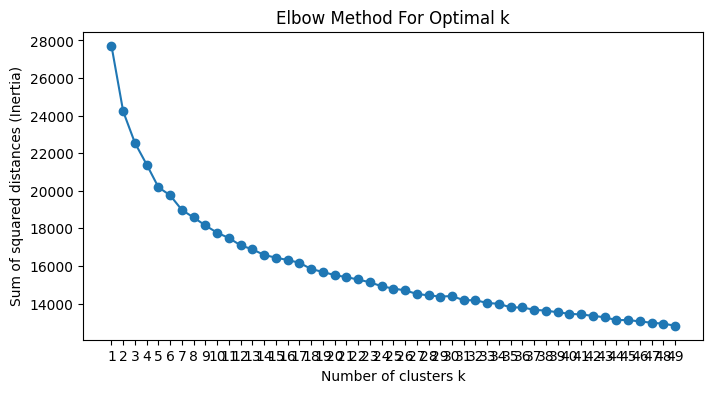

In [129]:
##Elbow Method
inertia = []
K = range(1, 50)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'o-', markersize=6)
plt.xlabel('Number of clusters k')
plt.ylabel('Sum of squared distances (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.xticks(K)
plt.show()

In [130]:
#Final with best K
best_k = 12
kmeans = KMeans(n_clusters=best_k, random_state=42)
games['cluster'] = kmeans.fit_predict(X_scaled)

#Looking at centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centers, columns=features)
print("Centroids (in original feature units):")
print(centroid_df)

#Cluster stats
print("\nCluster sizes:")
print(games['cluster'].value_counts())

Centroids (in original feature units):
          MIN      FG3M      FG3A        FTM        FTA      OREB      DREB  \
0   40.224138  0.988506  3.637931   4.683908   6.321839  1.160920  6.344828   
1   41.240000  4.820000  9.140000   7.110000   9.740000  1.300000  8.800000   
2   34.649425  0.758621  3.310345   3.172414   4.678161  0.856322  4.080460   
3   39.335052  0.701031  3.015464   8.170103  10.422680  1.097938  5.989691   
4   41.295775  1.584507  5.140845   6.816901   9.338028  1.605634  4.978873   
5   30.736486  1.175676  3.236486   3.614865   4.878378  0.993243  6.195946   
6   43.460938  1.257812  4.835938   7.656250  10.515625  3.000000  9.976562   
7   36.573034  3.691011  7.752809   3.837079   5.584270  0.775281  5.325843   
8   36.503401  1.142857  3.707483   4.224490   5.775510  0.469388  4.625850   
9   37.640693  1.532468  5.160173   3.640693   5.385281  1.402597  9.709957   
10  42.378151  1.638655  4.823529  12.848739  16.109244  1.067227  6.680672   
11  40.026549

In [131]:
games.loc[X.index, 'cluster'] = kmeans.fit_predict(X_scaled)

In [132]:
##PCA!!

pca = PCA(n_components=2, random_state=42)
pcs = pca.fit_transform(X_scaled)
games.loc[X.index, 'PC1'] = pcs[:, 0]
games.loc[X.index, 'PC2'] = pcs[:, 1]

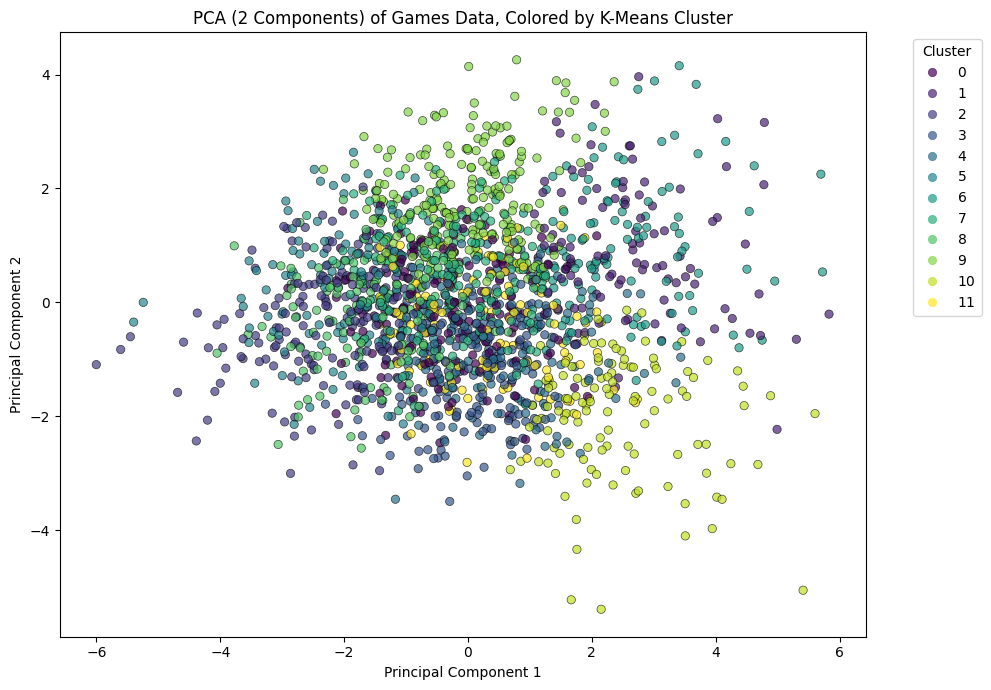

In [133]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    games['PC1'],
    games['PC2'],
    c=games['cluster'],
    alpha=0.7,
    edgecolor='k',
    linewidth=0.5
)
plt.legend(
    *scatter.legend_elements(),
    title="Cluster",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.title('PCA (2 Components) of Games Data, Colored by K-Means Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [134]:
games.head()


,SEASON_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,...,PTS,PLUS_MINUS,SEASON,Season_Type,SEASON_YEAR,TEAM,OPPONENT,cluster,PC1,PC2
0,22003,20300014,2003-10-29,CLE @ SAC,L,42,12,20,0.600,0,...,25,-9,2003-04,Regular,2004,CLE,SAC,0,-1.513650,-0.237939
1,22003,20300018,2003-10-30,CLE @ PHX,L,41,8,17,0.471,1,...,21,-3,2003-04,Regular,2004,CLE,PHX,9,0.401354,1.893045
2,22003,20300038,2003-11-01,CLE @ POR,L,39,3,12,0.250,0,...,8,-21,2003-04,Regular,2004,CLE,POR,2,-3.430563,-0.583616
3,22003,20300057,2003-11-05,CLE vs. DEN,L,41,3,11,0.273,0,...,7,-3,2003-04,Regular,2004,CLE,DEN,9,-1.690969,1.966485
4,22003,20300068,2003-11-07,CLE @ IND,L,44,8,18,0.444,1,...,23,-7,2003-04,Regular,2004,CLE,IND,4,-0.968078,-1.112424


In [ ]:
def find_similar_games(games_df, X_scaled, features, game_idx, n_neighbors=5):
    selected_cluster = games_df.loc[game_idx, 'cluster']
    

    ##Fliter by Cluster
    mask = games_df['cluster'] == selected_cluster
    cluster_indices = games_df.index[mask]
    X_cluster = X_scaled[mask]

    #Fit NN just on that cluster
    nn = NearestNeighbors(n_neighbors=n_neighbors+1, metric='euclidean')
    nn.fit(X_cluster)

    selected_vec = X_scaled[games_df.index.get_indexer([game_idx])[0]].reshape(1, -1) ##reshape to 2D, was a vector -> a 1 row matrix
    distances, neighbors = nn.kneighbors(selected_vec)
    
    #Drop first neighbor(itself)
    distances = distances.flatten() ##Flatten to 1D
    neighbors = neighbors.flatten()
    
    #find indices of similar games
    similar_idxs = cluster_indices[neighbors]
    
    # 7) Return df with similar games
    result = games_df.loc[similar_idxs].copy()
    result['distance'] = distances
    return result.sort_values('distance')

In [137]:
similar_games = find_similar_games(
    games_df=games,
    X_scaled=X_scaled,
    features=features,
    game_idx=1847,
    n_neighbors=5
)

similar_games

,SEASON_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,...,PLUS_MINUS,SEASON,Season_Type,SEASON_YEAR,TEAM,OPPONENT,cluster,PC1,PC2,distance
1847,22024,22401159,2025-04-09,LAL @ DAL,W,36,11,20,0.550,0,...,18,2024-25,Regular,2025,LAL,DAL,5,-1.086608,-0.607000,0.000000
378,22007,20700503,2008-01-08,CLE vs. SEA,W,35,8,18,0.444,0,...,13,2007-08,Regular,2008,CLE,SEA,5,-1.050328,-0.396545,1.684621
1652,22022,22200437,2022-12-16,LAL vs. DEN,W,36,13,21,0.619,1,...,26,2022-23,Regular,2023,LAL,DEN,5,-0.766567,0.603686,2.126688
1680,22022,22201140,2023-03-29,LAL @ CHI,W,31,10,19,0.526,1,...,23,2022-23,Regular,2023,LAL,CHI,5,-1.368257,0.202772,2.170582
167,22005,20500120,2005-11-18,CLE vs. ORL,W,34,6,17,0.353,0,...,25,2005-06,Regular,2006,CLE,ORL,5,-2.102971,-0.529650,2.310029
487,22008,20800774,2009-02-11,CLE vs. PHX,W,33,9,18,0.500,1,...,22,2008-09,Regular,2009,CLE,PHX,5,-0.716365,-0.895522,2.366262


In [138]:
games.to_sql(name='games', con=db_engine, if_exists='replace')

1848

In [6]:
games = pd.read_sql("SELECT * FROM LebronDatabase.games", db_engine, parse_dates=['GAME_DATE'])

In [7]:
games

,index,SEASON_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,PTS,PLUS_MINUS,SEASON,Season_Type,SEASON_YEAR,TEAM,OPPONENT,cluster,PC1,PC2
0,0,22003,20300014,2003-10-29,CLE @ SAC,L,42,12,20,0.600,...,25,-9,2003-04,Regular,2004,CLE,SAC,0,-1.513650,-0.237939
1,1,22003,20300018,2003-10-30,CLE @ PHX,L,41,8,17,0.471,...,21,-3,2003-04,Regular,2004,CLE,PHX,9,0.401354,1.893045
2,2,22003,20300038,2003-11-01,CLE @ POR,L,39,3,12,0.250,...,8,-21,2003-04,Regular,2004,CLE,POR,2,-3.430563,-0.583616
3,3,22003,20300057,2003-11-05,CLE vs. DEN,L,41,3,11,0.273,...,7,-3,2003-04,Regular,2004,CLE,DEN,9,-1.690969,1.966485
4,4,22003,20300068,2003-11-07,CLE @ IND,L,44,8,18,0.444,...,23,-7,2003-04,Regular,2004,CLE,IND,4,-0.968078,-1.112424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,1843,22024,22401117,2025-04-03,LAL vs. GSW,L,40,10,15,0.667,...,33,-1,2024-25,Regular,2025,LAL,GSW,7,1.058024,-0.503478
1844,1844,22024,22401126,2025-04-04,LAL vs. NOP,W,33,9,17,0.529,...,27,7,2024-25,Regular,2025,LAL,NOP,8,-1.890122,-2.359766
1845,1845,22024,22401135,2025-04-06,LAL @ OKC,W,34,9,16,0.563,...,19,7,2024-25,Regular,2025,LAL,OKC,2,-3.937929,-0.298735
1846,1846,22024,22401153,2025-04-08,LAL @ OKC,L,35,8,19,0.421,...,28,-23,2024-25,Regular,2025,LAL,OKC,4,0.245649,-0.603628


In [9]:
game_2025 = games[games['SEASON_YEAR'] == 2025]

In [12]:
from nba_api.stats.endpoints import PlayByPlayV2
import time

In [16]:
game_ids=  game_2025['Game_ID']
game_ids = [str(gid).zfill(10) for gid in game_ids]


In [ ]:
lebron_id = 2544
game_ids=  game_2025['Game_ID']


lebron_plays_list = []

for gid in game_ids:
    # fetch play-by-play (rate‐limit friendly)
    pbp = PlayByPlayV2(game_id=gid)
    df = pbp.get_data_frames()[0]
    
    # filter to only the plays where LeBron is involved as PLAYER1, PLAYER2, etc.
    mask = (
        (df['PLAYER1_ID'] == lebron_id) |
        (df['PLAYER2_ID'] == lebron_id) |
        (df['PLAYER3_ID'] == lebron_id)
    )
    df_lebron = df.loc[mask].copy()
    df_lebron['GAME_ID'] = gid  # keep track of which game
    
    lebron_plays_list.append(df_lebron)
    
    # polite pause so you don’t get throttled
    time.sleep(0.600)

# concatenate into one DataFrame
all_lebron_plays = pd.concat(lebron_plays_list, ignore_index=True)

# optional: reset index, sort by time, etc.
all_lebron_plays = all_lebron_plays.sort_values(
    ['GAME_ID', 'PCTIMESTRING'], ascending=[True, False]
).reset_index(drop=True)

print(all_lebron_plays.head())



,index,SEASON_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,PTS,PLUS_MINUS,SEASON,Season_Type,SEASON_YEAR,TEAM,OPPONENT,cluster,PC1,PC2
1779,1779,22024,22400062,2024-10-22,LAL vs. MIN,W,35,7,16,0.438,...,16,-6,2024-25,Regular,2025,LAL,MIN,2,-2.745022,0.333257
1780,1780,22024,22400085,2024-10-25,LAL vs. PHX,W,35,7,13,0.538,...,21,14,2024-25,Regular,2025,LAL,PHX,8,-1.725091,-0.713494
1781,1781,22024,22400096,2024-10-26,LAL vs. SAC,W,34,12,22,0.545,...,32,13,2024-25,Regular,2025,LAL,SAC,9,1.570089,3.682950
1782,1782,22024,22400111,2024-10-28,LAL @ PHX,L,36,3,14,0.214,...,11,-17,2024-25,Regular,2025,LAL,PHX,2,-2.368551,0.113280
1783,1783,22024,22400118,2024-10-30,LAL @ CLE,L,29,9,13,0.692,...,26,-17,2024-25,Regular,2025,LAL,CLE,2,-1.433840,-0.776792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,1843,22024,22401117,2025-04-03,LAL vs. GSW,L,40,10,15,0.667,...,33,-1,2024-25,Regular,2025,LAL,GSW,7,1.058024,-0.503478
1844,1844,22024,22401126,2025-04-04,LAL vs. NOP,W,33,9,17,0.529,...,27,7,2024-25,Regular,2025,LAL,NOP,8,-1.890122,-2.359766
1845,1845,22024,22401135,2025-04-06,LAL @ OKC,W,34,9,16,0.563,...,19,7,2024-25,Regular,2025,LAL,OKC,2,-3.937929,-0.298735
1846,1846,22024,22401153,2025-04-08,LAL @ OKC,L,35,8,19,0.421,...,28,-23,2024-25,Regular,2025,LAL,OKC,4,0.245649,-0.603628


In [44]:
pbp = PlayByPlayV2(game_id=game_ids[0])
df = pbp.get_data_frames()[0]


In [34]:
import re
import operator

In [45]:
event_msg_action_types = {}
pattern = re.compile(r"(?:\s{2}|'\s)([\w ]+)")
for _, play in df.iterrows():            #  <— iterate rows
    if play['EVENTMSGTYPE'] == 1:
        # pick the non-null description
        description = play['HOMEDESCRIPTION'] or play['VISITORDESCRIPTION']
        if not description:
            continue

        # try to match
        match = pattern.search(description)
        if not match:
            # no regex match -> skip or handle differently
            continue

        # group(1) is the text after the 2-spaces or apostrophe-space
        action = match.group(1).strip().replace(' ', '_').upper()

        # store the EVENTMSGACTIONTYPE
        event_msg_action_types[action] = play['EVENTMSGACTIONTYPE']

# sort and print
for action, code in sorted(event_msg_action_types.items()):
    print(f'\t{action} = {code}')

	3PT_JUMP_BANK_SHOT = 66
	3PT_JUMP_SHOT = 1
	3PT_PULLUP_JUMP_SHOT = 79
	3PT_RUNNING_JUMP_SHOT = 2
	3PT_STEP_BACK_JUMP_SHOT = 80
	ALLEY_OOP_DUNK = 52
	ALLEY_OOP_LAYUP = 43
	CUTTING_DUNK_SHOT = 108
	CUTTING_LAYUP_SHOT = 98
	DRIVING_DUNK = 9
	DRIVING_FINGER_ROLL_LAYUP = 75
	DRIVING_FLOATING_JUMP_SHOT = 101
	DRIVING_LAYUP = 6
	DUNK = 7
	FADEAWAY_JUMPER = 63
	FLOATING_JUMP_SHOT = 78
	LAYUP = 5
	PULLUP_JUMP_SHOT = 79
	PUTBACK_DUNK = 87
	PUTBACK_LAYUP = 72
	REVERSE_DUNK = 51
	RUNNING_ALLEY_OOP_LAYUP_SHOT = 100
	RUNNING_DUNK = 50
	RUNNING_FINGER_ROLL_LAYUP = 76
	RUNNING_LAYUP = 41
	STEP_BACK_JUMP_SHOT = 80
	TURNAROUND_FADEAWAY = 86


In [ ]:
mask = (
        (df['PLAYER1_ID'] == 2544) |
        (df['PLAYER2_ID'] == 2544)
    )

Lebron = df.loc[mask]
Lebron = Lebron[Lebron['EVENTMSGTYPE'].isin([1,4,6])]




,GAME_ID,EVENTNUM,EVENTMSGTYPE,EVENTMSGACTIONTYPE,PERIOD,WCTIMESTRING,PCTIMESTRING,HOMEDESCRIPTION,NEUTRALDESCRIPTION,VISITORDESCRIPTION,...,PLAYER2_TEAM_NICKNAME,PLAYER2_TEAM_ABBREVIATION,PERSON3TYPE,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ID,PLAYER3_TEAM_CITY,PLAYER3_TEAM_NICKNAME,PLAYER3_TEAM_ABBREVIATION,VIDEO_AVAILABLE_FLAG
3,0022400062,8,4,0,1,10:07 PM,11:29,L. James REBOUND (Off:0 Def:1),None,None,...,None,None,0,0,None,NaN,None,None,None,1
12,0022400062,24,4,0,1,10:10 PM,9:27,L. James REBOUND (Off:0 Def:2),None,None,...,None,None,0,0,None,NaN,None,None,None,1
19,0022400062,32,1,41,1,10:10 PM,8:56,L. James 3' Running Layup (2 PTS) (Davis 2 AST),None,None,...,Lakers,LAL,0,0,None,NaN,None,None,None,1
22,0022400062,37,1,50,1,10:11 PM,8:35,L. James 2' Running Dunk (4 PTS) (Reaves 1 AST),None,None,...,Lakers,LAL,0,0,None,NaN,None,None,None,1
94,0022400062,136,6,2,1,10:31 PM,1:08,L. James S.FOUL (P1.T4) (J.Williams),None,None,...,Timberwolves,MIN,1,0,None,NaN,None,None,None,1
136,0022400062,195,6,26,2,10:42 PM,9:09,None,None,Randle Offensive Charge Foul (P1) (J.Williams),...,Lakers,LAL,1,0,None,NaN,None,None,None,1
140,0022400062,201,4,0,2,10:42 PM,8:37,L. James REBOUND (Off:0 Def:3),None,None,...,None,None,0,0,None,NaN,None,None,None,1
141,0022400062,202,1,76,2,10:42 PM,8:33,L. James 5' Running Finger Roll Layup (6 PTS),None,None,...,None,None,0,0,None,NaN,None,None,None,1
149,0022400062,214,6,1,2,10:47 PM,7:34,None,None,McDaniels P.FOUL (P2.T1) (J.Orr),...,Lakers,LAL,1,0,None,NaN,None,None,None,1
208,0022400062,295,1,108,2,11:00 PM,2:14,L. James 2' Cutting Dunk Shot (8 PTS) (Reaves ...,None,None,...,Lakers,LAL,0,0,None,NaN,None,None,None,1


In [8]:
games

,index,SEASON_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,PTS,PLUS_MINUS,SEASON,Season_Type,SEASON_YEAR,TEAM,OPPONENT,cluster,PC1,PC2
0,0,22003,20300014,2003-10-29,CLE @ SAC,L,42,12,20,0.600,...,25,-9,2003-04,Regular,2004,CLE,SAC,0,-1.513650,-0.237939
1,1,22003,20300018,2003-10-30,CLE @ PHX,L,41,8,17,0.471,...,21,-3,2003-04,Regular,2004,CLE,PHX,9,0.401354,1.893045
2,2,22003,20300038,2003-11-01,CLE @ POR,L,39,3,12,0.250,...,8,-21,2003-04,Regular,2004,CLE,POR,2,-3.430563,-0.583616
3,3,22003,20300057,2003-11-05,CLE vs. DEN,L,41,3,11,0.273,...,7,-3,2003-04,Regular,2004,CLE,DEN,9,-1.690969,1.966485
4,4,22003,20300068,2003-11-07,CLE @ IND,L,44,8,18,0.444,...,23,-7,2003-04,Regular,2004,CLE,IND,4,-0.968078,-1.112424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,1843,22024,22401117,2025-04-03,LAL vs. GSW,L,40,10,15,0.667,...,33,-1,2024-25,Regular,2025,LAL,GSW,7,1.058024,-0.503478
1844,1844,22024,22401126,2025-04-04,LAL vs. NOP,W,33,9,17,0.529,...,27,7,2024-25,Regular,2025,LAL,NOP,8,-1.890122,-2.359766
1845,1845,22024,22401135,2025-04-06,LAL @ OKC,W,34,9,16,0.563,...,19,7,2024-25,Regular,2025,LAL,OKC,2,-3.937929,-0.298735
1846,1846,22024,22401153,2025-04-08,LAL @ OKC,L,35,8,19,0.421,...,28,-23,2024-25,Regular,2025,LAL,OKC,4,0.245649,-0.603628


In [69]:
from atproto import Client
client = Client()
client.login('jonbonbierly@gmail.com', 'Gryffindog1')

ProfileViewDetailed(did='did:plc:vxibsva5rtrgva2fvmcr2lhs', handle='jonbierly.bsky.social', associated=ProfileAssociated(chat=None, feedgens=0, labeler=False, lists=0, starter_packs=0, py_type='app.bsky.actor.defs#profileAssociated'), avatar='https://cdn.bsky.app/img/avatar/plain/did:plc:vxibsva5rtrgva2fvmcr2lhs/bafkreifdxnqfn6ku4glscqqha3hyshe4bnxswb6u623s6t44qml552dtgy@jpeg', banner=None, created_at='2025-04-27T16:56:20.175Z', description=None, display_name='', followers_count=0, follows_count=1, indexed_at='2025-04-27T16:56:20.175Z', joined_via_starter_pack=None, labels=[], pinned_post=None, posts_count=0, verification=None, viewer=ViewerState(blocked_by=False, blocking=None, blocking_by_list=None, followed_by=None, following=None, known_followers=None, muted=False, muted_by_list=None, py_type='app.bsky.actor.defs#viewerState'), py_type='app.bsky.actor.defs#profileViewDetailed')

In [70]:
from datetime import datetime, timedelta, time

def fetch_lebron_posts_window(game_date, game_id, limit=5, sort="top"):
    # window: 19:00 of game_date → 12:00 of game_date+1
    since_dt = datetime.combine(game_date, time.min) + timedelta(hours=19)
    until_dt = datetime.combine(game_date + timedelta(days=1), time.min) + timedelta(hours=12)
    params = {
        "q":     "LEBRON",
        "sort":  sort,
        "since": since_dt.isoformat() + "Z",
        "until": until_dt.isoformat() + "Z",
        "limit": limit,
    }

    # call the SDK method instead of requests.get(...)
    res = client.app.bsky.feed.search_posts(params)  
    posts = []
    for post in res.posts:
        # convert Pydantic model → dict, then attach game_id
        post_dict = post.model_dump()   # or .dict() if you’re on an older pydantic/sdk
        post_dict["game_id"] = game_id
        posts.append(post_dict)
    return posts


In [71]:
skeet_games = games[games['GAME_DATE'].dt.year.isin([2024, 2025])]

all_posts = []
for _, row in skeet_games.iterrows():
    gd  = row['GAME_DATE'].date()
    gid = row['Game_ID']
    batch = fetch_lebron_posts_window(gd, gid, limit=5, sort="top")
    all_posts.extend(batch)

# 3. build DataFrame
posts_df = pd.json_normalize(all_posts)


In [100]:
cols_to_keep = [
    # your filter
    "game_id",

    # the unique IDs & links (so you can deep-link back if you want)
    "cid",
    "uri",

    # when it was posted
    "indexed_at",

    # who posted it
    "author.did",
    "author.handle",
    "author.display_name",
    "author.avatar",

    # the body text
    "record.text",

    # engagement counts
    "reply_count",
    "repost_count",
    "like_count",
    "quote_count",
]

# then just trim your df:
posts_df = posts_df[cols_to_keep].copy()


In [102]:
posts_df.to_sql(name='posts', con=db_engine, if_exists='replace')

557

In [101]:
from dash import Dash, dcc, html, Input, Output
import dash_bootstrap_components as dbc
from datetime import datetime, timezone

# 1) load posts_df however you like…
posts_df
# 2) initialize Dash and pull in Bootstrap + FontAwesome
app = Dash(
    __name__,
    external_stylesheets=[
        dbc.themes.BOOTSTRAP,
        "https://cdnjs.cloudflare.com/ajax/libs/font-awesome/5.15.4/css/all.min.css"
    ]
)

app.layout = html.Div([
    dbc.Container([
        html.H1("🕊️ Skeets by Game"),
        dcc.Dropdown(
            id="game-dropdown",
            options=[{"label": str(g), "value": g}
                     for g in sorted(posts_df["game_id"].unique())],
            placeholder="Select a game_id…",
        ),
        html.Div(id="posts-container")
    ], fluid=True)
])

def time_ago(iso_ts):
    """Return '37m', '2h', '3d', etc. from an ISO timestamp."""
    try:
        dt = datetime.fromisoformat(iso_ts.replace("Z","+00:00"))
    except Exception:
        return ""
    now = datetime.now(timezone.utc)
    delta = now - dt
    secs = delta.total_seconds()
    if secs < 60:    return f"{int(secs)}s"
    if secs < 3600:  return f"{int(secs//60)}m"
    if secs < 86400: return f"{int(secs//3600)}h"
    days = delta.days
    return f"{days}d" if days < 7 else dt.strftime("%b %d")

@app.callback(
    Output("posts-container", "children"),
    Input("game-dropdown", "value")
)
def display_skeets(game_id):
    if not game_id:
        return html.Em("Please pick a game above.")
    df = posts_df[posts_df["game_id"] == game_id]
    skeets = []
    for _, row in df.iterrows():
        avatar_url   = row.get("author.avatar") or "/assets/default-avatar.png"
        display_name = row.get("author.display_name") or row.get("author.handle", "")
        handle       = "@" + row.get("author.handle", "")
        ts           = row.get("indexed_at") or row.get("indexed_at","")
        ago          = time_ago(ts)
        text         = row.get("record.text","")

        skeets.append(
            html.Div([
                # — header: avatar + name/handle/timestamp
                html.Div([
                    html.Img(src=avatar_url, className="avatar"),
                    html.Div([
                        html.Span(display_name, className="name"),
                        html.Span(handle, className="handle"),
                        html.Span("·", className="dot"),
                        html.Span(ago, className="time"),
                    ], className="user-info"),
                ], className="header"),

                # — the text of the post (Markdown will auto-link URLs)
                html.Div(
                    dcc.Markdown(text, link_target="_blank"),
                    className="content"
                ),

                # — footer with reply/repost/like icons
                html.Div([
                    html.Div([
                        html.I(className="far fa-comment"),
                        html.Span(row.get("repliesCount", 0))
                    ], className="action"),
                    html.Div([
                        html.I(className="fas fa-retweet"),
                        html.Span(row.get("repostsCount", 0))
                    ], className="action"),
                    html.Div([
                        html.I(className="far fa-heart"),
                        html.Span(row.get("likesCount", 0))
                    ], className="action"),
                ], className="actions"),

            ], className="skeet")
        )
    return skeets

if __name__ == "__main__":
    app.run(debug=True)
